<a href="https://colab.research.google.com/github/onishiryo/2025DAworkshop/blob/main/wxbc-test/amedas_predictive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. アメダス気象データ分析チャレンジ！（Python版）　予測的分析

<div style="padding: 10px; margin-bottom: 10px; border: 2px double #333333; background-color: #e8e8e8; color: #000000;">
    <B>Copyright 2024 気象ビジネス推進コンソーシアム、岐阜大学　吉野純<br>
(C) 2024 WXBC、岐阜大学　吉野純</B><br>

＜利用条件＞<br>

本書は、本書に記載した要件・技術・方式に関する内容が変更されないこと、および出典を明示いただくことを前提に、無償でその全部または一部を複製、翻案、翻訳、転記、引用、公衆送信等して利用できます。なお、全体または一部を複製、翻案、翻訳された場合は、本書にある著作権表示および利用条件を明示してください。<br>

＜免責事項＞<br>

本書の著作権者は、本書の記載内容に関して、その正確性、商品性、利用目的への適合性等に関して保証するものではなく、特許権、著作権、その他の権利を侵害していないことを保証するものでもありません。本書の利用により生じた損害について、本書の著作権者は、法律上のいかなる責任も負いません。<br>
</div>

次に，**過去の気象データ** と **過去の電力消費量データ** を分析することで **統計的モデル（ニューラルネットワーク）を構築して将来の電力消費量を予測** します．このような分析を **予測的分析（Predictive Analytics）** と言います．予測的分析により，例えば，商品ごとの需要を予測分析することによって，需要が上がるタイミングで商品を発注し，そして需要が下がるタイミングで値下げを行い，企業の潜在的な商機やリスクを特定することが可能となります．<BR>

アメダス気象データ分析チャレンジ！（Python版）の診断的分析の理解を前提としていますので，必要があれば前回の資料を復習しながら読み進めてください．<BR>

- **[2.1 ニューラルネットワークとは？](#2.1-ニューラルネットワークとは？)**
- **[2.2 sklearn(scikit-learn)のニューラルネットワーク（neural_networkクラス）](#2.2-sklearn(scikit-learn)のニューラルネットワーク（neural_networkクラス）)**
- **[2.3 使用するデータ](#2.3-使用するデータ)**
    - [2.3.1 気象庁AMeDASの気象データ](#2.3.1-気象庁AMeDASの気象データ)
    - [2.3.2 東京電力の電力消費量データ](#2.3.2-東京電力の電力消費量データ)
- **[2.4 Pythonプログラムの構成と実行](#2.4-Pythonプログラムの構成と実行)**
    - [2.4.1 ライブラリのインポート](#2.4.1-ライブラリのインポート)
    - [2.4.2 気象庁AMeDASの気象データ（csv形式）を読む](#2.4.2-気象庁AMeDASの気象データ（csv形式）を読む)
    - [2.4.3 東京電力の電力消費量データ（csv形式）を読む](#2.4.3-東京電力の電力消費量データ（csv形式）を読む)
    - [2.4.4 2つのデータを結合して整理する](#2.4.4-2つのデータを結合して整理する)
    - [2.4.5 学習データと検証データの作成](#2.4.5-学習データと検証データの作成)
    - [2.4.6 データの標準化](#2.4.6-データの標準化)
    - [2.4.7 統計的モデルの設定と最適化](#2.4.7-統計的モデルの設定と最適化)
    - [2.4.8 時系列図と散布図の作成](#2.4.8-時系列図と散布図の作成)
- **[2.5 まとめ](#2.5-まとめ)**

### 2.1 ニューラルネットワークとは？

今回利用する **ニューラルネットワーク** は，**教師あり学習** の一種です．教師あり学習では，**教師データ（正解データ）** による学習（訓練）が必要となります．例えば，スパムメールフィルタでは，事前にそのメールであるかどうかの正解を教えてあげる必要があります．教師あり学習には  **「分類（classification）問題」** と **「回帰（regression）問題」** があります．「分類問題」とは，例えば「気温（24℃）」という入力データから「アイスが売れる(1)」か「アイスが売れない(0)」といった2クラスや「今日売れそうな商品(ビール，コーラ，コーヒー，お茶・・・)」といった多クラスを分類するような問題を指します．また，「回帰問題」とは，例えば「気温（24℃）」という入力データから「アイスが何個売れる（100個）」という出力値を予測するような問題を指します．

前回の診断的分析の中でも気温と電力消費量との間の散布図を作成し，**線形回帰モデル** （ライブラリ`scikit-learn(sklearn)`）により回帰直線を引きました．これも回帰問題です．**線形回帰モデル** では **説明変数と目的変数との間に線形の関係** があることを仮定されていますが，**非線形な関係** であってもその関係を表現できることができるのが **ニューラルネットワーク（非線形回帰モデル）** です．

そもそもモデルとは，**入力値（説明変数）$x$** （例えば，気温）を与えることで， **出力値（目的変数）$y=f(x)$** （例えば，電力消費量)を得るような **関数$f$** を指します．

![FIG12.png](attachment:FIG12.png)
図：モデルとは？

ニューラルネットワークは，今流行の人工知能（AI）の基本的な技術となっていますので，まずはニューラルネットワークの基本的な仕組みから理解していきましょう．


ニューラルネットワークでは，人間の脳内にある **神経細胞（ニューロン）** とそのつながり，つまり神経回路網を人工ニューロンという数式的なモデルで表現しています．ニューロンが他のニューロンと繋がっている状態を **シナプス結合** といい，電気信号が伝わることによって情報的なつながり **ネットワーク** を形成しています．シナプスとシナプスの間の情報伝達効率は，前後のニューロンの活動状態によって決まり保持されます．このようなシナプスの情報伝達効率が生物の記憶や学習において重要な役割を果たしています．人間の脳では，1個のニューロンにおよそ1000個のニューロンが結合し，全部で1000億個のニューロンが存在していると言われており，人間の複雑な知性を司っていると考えられています．

![FIG02.png](attachment:FIG02.png)
図：ニューロンの構造


神経細胞（ニューロン）をコンピュータ上でモデル化したものを人工ニューロンやパーセプトロンともいいます．まず，中央のニューロン（破線の円）に着目すると，まず，入力側（$u$）では$m$個のニューロンから $u = b + w_1 \times x_1 + w_2 \times x_2 + \cdots + w_m \times x_m = b + \sum_{i=1}^{m} w_m x_m $ という値を受け取っています．ここで，$x_1、x_2、x_3$ が前のニューロンから伝わってくる電気信号に当たり，$w_1、w_2、w_3$がニューロン間の情報伝達効率に当たります．多数のニューロンから伝達される **入力$x$** と **重み$w$** の線形結合に **バイアス$b$** と呼ばれる定数を足すことで，ニューロンに入る電気信号の強さが決まります．また，中央のニューロンの出力側（$o$）に注目すると，ニューロンが蓄積した電気量$y=f(u)$がある一定の閾値aを超えるかどうかによって，1または0どちらかの値が出力されています．1が出力される場合はニューロンの発火を，0が出力される場合にはニューロンの非発火を意味します．ここで，$f$は **活性化関数** と呼ばれる関数であり，蓄積した電気量をもとに発火（1）するか非発火（0）かを判断する関数です．

ニューラルネットワークにおける活性化関数（Activation function）は，ニューロンを興奮させるための関数であり，ニューロンの興奮状態を発火（1）か非発火（0）を表す信号に変換します．この活性化関数は，**非線形変換** である必要があり，これによりニューラルネットワークの複雑な表現力を可能にします（線形変換は何回重ねてもても線形の変化しか表現できない）．

使われる活性化関数は時代とともに変化しています．初期には，**「ステップ関数」** という活性化関数が用いられていましたが，「誤差逆伝播法」が登場してからは **「シグモイド関数（ロジスティック関数）」** や **「tanh関数」** が使われるようになりました．また，最近のディープニューラルネットワークでは勾配消失の問題を解決させた **「ReLU」** がよく使われるようになりました．

また，出力層で使われる活性化関数は，**二クラスの分類問題** の場合は **「シグモイド関数（ロジスティック関数）」** ， **多クラスの分類問題** の場合は **「ソフトマックス関数」** ， **回帰問題** の場合は **「恒等関数」** が挙げられます．

![FIG03.png](attachment:FIG03.png)
図：パーセプトロンの構造


このような単純な計算をしているニューロンが複雑に組み合わさりネットワークを組むことで，次々と電気信号が下流側へと伝達され，高度な「分類」や「回帰」が可能となります．これが **ニューラルネットワーク** です．ニューラルネットワークを理解する上で重要なのは，**「入力層」** **「中間層（隠れ層）」** **「出力層」** です．そして，ニューロン同士をつなぐ **「重み」** です．ここで，**「重み」** は，情報と情報のつながりの強さを表すパラメータです．この「重み」の大きさは，「入力層」と「出力層」に教師データを入力して **学習** することによって設定されます．**情報（説明変数）** が入力されるニューロンは **入力層** といいます．複数の説明変数があれば層は複数ニューロンで構成されます．入力層から情報を受け取った **「中間層（隠れ層）」** のニューロンは受け取った情報を自分なりに評価して，伝言ゲームのようにして，その結果を次の層のニューロンに伝達します．それを繰り返した末に，最終的に，**情報（目的変数）** が **「出力層」** に伝わります．このような，入力層から出力層へと一方向的に情報が伝わるニューラルネットワークのことを，**「フィードフォワード（順伝播型）ニューラルネットワーク」** といいます．

下のフィードフォワードニューラルネットワークの例では，傘の画像の1つ1つのピクセルの輝度が配置された入力層から入っていきます．出力層には，「傘」「ゴルフクラブ」「杖」のニューロンが配置されています．入力層から入った情報は，中間層を伝って，最終的には，出力層の中の「傘」のニューロンに大きな電気信号（情報）が伝わり，画像が80%の確率で「傘」であると認識できたわけです（分類問題の場合）．

![FIG04.png](attachment:FIG04.png)
図：フィードフォワードニューラルネットワークの構造

さて，精度の高いニューラルネットワークを作る上で，ニューロン同士をつなぐ多数の重み$w$の **学習** が重要となってきます（正確にはバイアス$b$も学習の対象となりますが，重み$w$の一種として考えることとしましょう）．重み$w$の学習とは，様々な画像に対応する出力値と正解値との間の **誤差が最小** となるに重み$w$をチューニングしていく過程のことを指します．順伝播によって得られた出力値と予め用意された正解値との間で評価された誤差$E$（下の例では２乗和誤差）から，**層を逆方向に遡る**ようにして重み$w$の値を少しずつ **更新** していきます．伝言ゲームの答え合わせをするようなイメージです．たくさんの教師データによりこのような更新の手続きを繰り返すことで次第にニューラルネットワークの誤差$E$が最小になるように **最適化** されていきます．

このような誤差$E$が最小になるように重み$w$をチューニングする際に，**「勾配降下法」** と **「誤差逆伝播法」** という方法が用いられます．

![FIG05.png](attachment:FIG05.png)
図：ニューラルネットワークの学習
    

### 2.2 sklearn(scikit-learn)のニューラルネットワーク（neural_networkクラス）

ここでは機械学習ライブラリ`sklearn`（scikit-learn）の中の **neural_netorkクラス** を用いて統計学的に予測モデルを構築してみましょう．

ライブラリ`sklearn`（scikit-learn）は，基本的な機械学習のアルゴリズムやデータセットを備えており，単純で定型的なコードで実装できるため手軽に機械学習を始めることができます．`sklearn`（scikit-learn）には機械学習に関する6つのパッケージ：1) 回帰問題，2) 分類問題，3) クラスタリング，4) 次元削減，5) モデル評価，6) データ前処理があります．ここでは， **「回帰問題」** のための **ニューラルネットワークモデルのクラス`neural_network.MLPRegressor`** を統計モデルとして導入します．また， `sklearn`には， **「分類問題」** に対しても，ニューラルネットワークを使うこともできます．その場合は， **クラス`neural_network.MLPClassifier`** を導入します．
`sklearn`（scikit-learn）のニューラルネットワークの **ハイパーパラメータ** の詳細については，scikit-learnの公式ホームページ https://scikit-learn.org/stable/modules/neural_networks_supervised.html を参照してください．<BR>

まず，最も簡単なニューラルネットワークを作ってみましょう．以下に示すプログラムのように，`sklearn`(scikit-learn)を使えば **短いのプログラムで機械学習ができてしまいます．**

ここでは，まず，<span style="color: red; ">「1, 3, 5, 7, 9」と与えると（説明変数），その値を2乗して「1, 9, 25, 49, 81」と出力してくれるモデル</span>を作成してみましょう．

以下のプログラムでは，15行目の`x_train=np.array([[1],[3],[5],[7],[9]], dtype=np.float)`では，訓練データの **説明変数$x$** を **「1」「3」「5」「7」「9」と5つ設定** しています．それに対応する **目的変数$y$** は，17行目の`y_train=np.array([[1],[9],[25],[49],[81]], dtype=np.float)`で，**「1」「9」「25」「49」「81」と5つ設定** しています．

19行目の`x_test=np.array([[2],[4],[6],[8]], dtype=np.float)`では，検証データの　**説明変数$x$** を，**未知の「2」「4」「6」「8」を4つ設定** しています．そして，対応する **目的変数$y$つまり正解値** は，21行目の`y_test=np.array([[4],[16],[36],[64]], dtype=np.float)`で， **説明変数を2倍した「4」「16」「36」「64」と4つ設定** しています．

これらのデータを用いて，24行目と28行目で`model1`インスタンスを作成して，活性化関数`relu`，勾配降下法の一種である`adam`により最適化計算を行います．ニューラルネットワークの設定にはハイパーパラメータの設定が不可欠となります．

30行目の`y_test_predict=model1.predict(x_test)`で予測された結果が，どの程度正しいのかを33行目の`mse=mean_squared_error(y_test, y_test_predict)`で平均二乗誤差を計算することで判定します．

早速，以下のプログラムを動かしてみましょう． **入力値を2乗にするモデル** ができているでしょうか？？

y_test= [ 4. 16. 36. 64.] y_test_predict= [ 4.471 15.96  36.228 65.001]
Mean square error= 0.3193864277102224


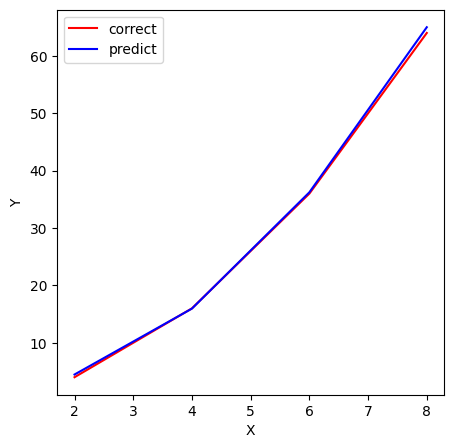

In [1]:
# numpyをnpという別名でインポートします．
import numpy as np
# sklearn(scikit-learn)のニューラルネットワークのライブラリをインポートします
from sklearn import neural_network
# sklearn(scikit-learn)の線形重回帰モデルをインポートします．
#from sklearn import linear_model
# sklearn(scikit-learn)の平均二乗誤差のライブラリをインポートします
from sklearn.metrics import mean_squared_error
# 作図のためにmatplotlibをpltという別名でインポートします．
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline

# 訓練データの説明変数の設定
x_train=np.array([[1],[3],[5],[7],[9]], dtype=np.float64)
# 訓練データの目的変数の設定
y_train=np.array([[1],[9],[25],[49],[81]], dtype=np.float64)
# 検証データの説明変数の設定
x_test=np.array([[2],[4],[6],[8]], dtype=np.float64)
# 検証データの目的変数（正解）の設定
y_test=np.array([[4],[16],[36],[64]], dtype=np.float64)

# neural_networkクラスからmodel1インスタンスを作成
model1 = neural_network.MLPRegressor(solver="adam",activation="relu", hidden_layer_sizes=(100,100,),max_iter=100000,tol=1e-6,n_iter_no_change=50,random_state=5,verbose=False)
# linear_modelクラスからmodel1インスタンスを作成
#model1 = linear_model.LinearRegression()
# 予測モデルの最適化
model1.fit(x_train, y_train.ravel())
# モデルによる予測データの作成（検証用データ）
y_test_predict=model1.predict(x_test)
print('y_test=',y_test.ravel(),'y_test_predict=',y_test_predict)
# 平均二乗誤差の評価
mse=mean_squared_error(y_test, y_test_predict)
print('Mean square error=',mse)

# 検証データと予測データの作図
plt.figure(figsize=(5,5))
plt.plot(x_test,y_test,color='red',label='correct')
plt.plot(x_test,y_test_predict,color='blue',label='predict')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

予測された結果を見ると，**説明変数「2」「4」「6」「8」** に対して，いずれの **予測値も「4.471」「15.96」「36.228」「65.001」** となっています． **正解値「4」「16」「36」「64」とほぼ一致する結果** が得られています． **平均二乗誤差MSEも小さく** 適切にモデル化できていると言えるでしょう．<BR>

この例のように非線形の変化をする場合，線形重回帰モデルでは予測できません．26行目のmodel1インスタンスの作成を線形重回帰モデル`linear_model.LinearRegression()`に置き換えてみることで，再度，上のプログラムを動かしてみてください．この比較により，ニューラルネットワークを用いることでより複雑な変化（非線形）をモデル化できることが理解できると思います．<BR>

さて，実際の気象データと電力消費データからsklearn(scikit-learn)のニューラルネットワークにより統計モデルを作成してみましょう．<BR>

### 2.3 使用するデータ

#### 2.3.1 気象庁AMeDASの気象データ

**気象データ** と **ビジネスデータ** により **統計的モデル** を作ってみましょう．このプログラムでは， **気象データ** として，気象庁AMeDASの2017年1月1日1時～2019年1月1日0時の **1時間毎** の **2年間分** の **東京** の **気温** と **露点温度** を使用します．これは，毎正時（00分）の1分間平均データ（前1分間）が記録されています．例えば，「12時の気温」は「11時59分から12時00分に観測された気温の平均」となります．また，露点温度は，気体を冷却することで凝結（結露）する温度のことを指し，空気の湿り具合を表す指標の1つです． **前半の1年間** つまり2017年1月1日1時～2018年1月1日0時の間のデータは **予測の学習データ** として， **後半の1年間** つまり2018年1月1日1時～2019年1月1日0時の間のデータは**予測の検証データ**として使用されます．ファイル名は，amedas.csvとします．ダウンロードの詳細については，「アメダス気象データ分析チャレンジ！（Python版）診断的分析」の講義内容をご覧下さい．

気象庁のホームページのリンク：
http://www.data.jma.go.jp/gmd/risk/obsdl/


![スクリーンショット 2024-07-20 223552.png](attachment:054d5fe6-7792-405f-a15c-26e56fe3ab63.png)

今回のチャレンジ！では事前に用意したcsv形式のファイル（amedas.csv）を使用しますので，データをダウンロードしていただく必要はありませんが，異なる地点や期間，異なる気象要素を各自でダウンロードして分析してみて下さい．

#### 2.3.2 東京電力の電力消費量データ

また，このプログラムでは， **東京電力の電力消費量データ** を使用します．気象庁AMeDASの気温データと同様に，2017年1月1日0時～2018年12月31日23時の **1時間毎** の **2年間分** の **東京電力** の **電力消費量** を入手します．これは，毎正時（00分）の1時間平均データ（後1時間）が記録されています．例えば，「12時の電力消費量」は「12時00分から13時00分までの電力消費量の平均」となります． **前半の1年間** つまり2017年1月1日1時～2018年1月1日0時の間のデータは **予測の学習データ** として， **後半の1年間** つまり2018年1月1日1時～2019年1月1日0時の間のデータは**予測の検証データ**として使用されます．ファイル名は，tepco.csvとします．このデータは，統計的モデルにおける目的変数として使われるだけでなく，検証用データ（正解データ）としても使用されます．ダウンロードの詳細については，「アメダス気象データ分析チャレンジ！（Python版）診断的分析」の講義内容をご覧下さい．

東京電力でんき予報のリンク：
http://www.tepco.co.jp/forecast/index-j.html


![スクリーンショット 2024-07-20 223827.png](attachment:33396eb3-b52e-4bfb-bb80-32366d38d609.png)

今回のチャレンジ！では事前に用意したcsv形式のファイル（tepco.csv）を使用しますので，データをダウンロードしていただく必要はありませんが，異なる地域の電力消費量データやその他のオープンデータを各自でダウンロードして分析してみて下さい．

### 2.4 Pythonプログラムの構成と実行

このプログラムは，本日配布した資料一式の中のpythonプログラム`predictive_analytics.py`を，Jupyter Notebook用に再収録したものです．どちらも同じ内容のpythonプログラムとなっています．このプログラムは，以下のような構成となっています．<BR>

　**1. ライブラリのインポート<BR>
　2. 気象庁AMeDASの気象データ（csv形式）を読む<BR>
　3. 東京電力の電力消費量データ（csv形式）を読む<BR>
　4. 2つのデータを結合して整理する<BR>
　5. 学習データと検証データの作成<BR>
　6. データの標準化<BR>
　7. 統計的モデルの設定と最適化<BR>
　8. 時系列図と散布図の作成**<BR>

早速，１つずつ手を動かしてみましょう．

#### 2.4.1 ライブラリのインポート

以下のセルから，プログラムが始まります．上のプルダウンメニューが「Code」となっているセルがpythonプログラムに相当します．セルにカーソルを合わせて上にある「Run」ボタンを押して実行して下さい．以降のプログラムは上のプログラムを前提にして組み立てられてますので，上から順番に実行する必要がありますので注意して下さい．

上の「View」タブの中の「Show Line Numbers」をクリックすると，セルに行番号が表示されるので表示させて読み進めて下さい．

まずは，必要な**ライブラリをインポート**します．2行目で数値計算ライブラリ`numpy`をインポートします．`import numpy as np`とすることで，プログラム中ではnpと省略してインポートすることができます．作図のための，`matplotlib`と`seaborn`も4行目と6行目でインポートします．また，8行目の`datetime`は日付（日時や時間）の処理ができる便利なライブラリで，気象データ分析には必須となります．また，10行目でデータの前処理や整理に不可欠な`pandas`もインポートします．機械学習に必要となる標準化などの前処理のためのライブラリ`preprocessing`を16行目でインポートします．最後に，18行目の線形重回帰モデル（`linear_model`）と20行目のニューラルネットワーク（`neural_network`）を作成するのに必要な`sklearn` (scikit-learn)もインポートします．

Jupyter Notebookの中だけで有効なマジックコマンド`%precison 3`（小数点3桁まで）と`%matplotlib inline`（インラインで画像を表示）も忘れずにつけましょう．

In [2]:
# numpyをnpという別名でインポートします．
import numpy as np
# matplotlibをpltという別名でインポートします．
import matplotlib.pyplot as plt
# Seabornをインポートします．
import seaborn as sns
# datetimeは日時データを処理する際に便利なメソッドです．インポートします．
from datetime import datetime
# pandasをpdという別名でインポートします．
import pandas as pd
# matplotlibで時系列図を作成するときには以下をインポートします
from pandas.plotting import register_matplotlib_converters
# これを登録しておきます．
register_matplotlib_converters()
# sklearn(scikit-learn)の前処理のためのライブラリをインポートします
from sklearn import preprocessing
# sklearn(scikit-learn)の線形重回帰モデルをインポートします．
from sklearn import linear_model
# sklearn(scikit-learn)のニューラルネットワークのライブラリをインポートします
from sklearn import neural_network
%precision 3
%matplotlib inline

#### 2.4.2 気象庁AMeDASの気象データ（csv形式）を読む

まずは，前回の診断的分析と同様に， **気象庁AMeDASの気象データ（amedas.csv）** を読み込んで， **pandasのデータフレーム** としてメモリすることからはじめます．表計算ソフトのExcelで例えるならば，Excelを起動してcsvファイルを開いた状態です．

このデータを見ると，上から5行目まではデータとは関係のないヘッダー情報となっているようです．6行目から最終列（17525列目）までのデータ部が必要な情報です．また，A列は日時と時刻，B列が気温(℃)，C列とD列は気温の品質や均質に関する参考情報となっています．また、E列は露点温度(℃)，F列とG列は露点温度の参考情報となっています．今回のデータ分析に必要なデータは3列分（A列，B列，E列）のみです．ここでは，前回の診断的分析に基づき，気温と露点温度が電力消費量の変化に影響するものと仮設を立ててデータを用意しています．そして，分析に不要な情報は削除し，必要な情報だけをメモリする必要があります．

インポートしたpandasには， **csvファイルを読み込むメソッド`pd.read_csv`** が備わっています．これを使うとcsvファイルをそのままデータフレームに割り当てることができます．後の **データ整理** ではpandasのデータフレームを使うと便利なので好都合です．ここでは，以下のセルのように`readamedas`という関数（3行目）の中でデータの読み込みを行います．この関数は分かりやすく複数行に別けて書かれていますが，メソッド`pd.read_csv`を使えば， **実質1行分のプログラミング** でデータを読み込むことができます．この`pd.read_csv`（13行目）の引数として，14～19行目の6種類を入力する必要があります．

`pd.read_csv(`<BR>
    
   **filename：**ファイル名（ここでは，amedas.csv）<BR>
   **encoding：**文字エーコーディング（ここでは，Shift_JIS）<BR>
   **skiprows：**上から何行分を読み飛ばすか（ここでは，5行）<BR>
   **names：**列のラベル（ここでは，A列～D列を['date_time', 'T', 'dummy1', 'dummy2', 'Td', 'dummy3', 'dummy4']とつけます）<BR>
   **parse_dates：**datetime型で読み込む列（ここでは，'date_time'の列をdatetime型で読み込む）<BR>
   **index_col：**インデックスとする列（ここでは，'datetime'）<BR>
  
 `)`<BR>
  
この様にして読み込んだデータは，pandasのデータフレーム型で割り当てられて，関数の中の`df`という変数から，メインプログラムでは`amedas`という変数に戻されて格納されます（29行目）．その直後の31行目では，

`amedas=amedas.drop(['dummy1', 'dummy2', 'dummy3', 'dummy4'], axis=1)`

のメソッド`drop`により，ラベルが'dummy1'～'dummy4'の列が削除されています．**`axis=1`**とすると **列の方向で削除** されるという意味です．**`axis=0`**とすれば **行の方向で削除** されます．

それでは実行してみましょう．

In [6]:
# 気象庁アメダスの気温の時系列データを読み込んで，
# DataFrameに割り当てる関数
def readamedas(filename,skipline):
    # pandasのread_csvというメソッドでcsvファイルを読み込みます．
    # 引数として，
    # [0]入力ファイル名
    # [1]エンコーディング
    # [2]読み飛ばす行数，
    # [3]column名
    # [4]datetime型で読み込むcolumn名
    # [5]indexとするcolumn名
    # を与える．
    df=pd.read_csv(
       filename,
       encoding='Shift_JIS',
       skiprows=skipline,
       names=['date_time','T','dummy1','dummy2','Td','dummy3','dummy4'],
       parse_dates={'datetime':['date_time']},
       index_col='datetime'
       )
    return df

# 気象庁AMeDAS（東京）の気温（℃）と露点温度（℃）のcsvファイルの名前を指定します．
!pwd
!ls
#filename1='amedas.csv'
filename1='/content/drive/MyDrive/Colab Notebooks/20240724challenge_shiryo3_predictive_analytics/amedas.csv'
# csvファイルの上から5行目まではデータではないため呼び飛ばします．
skipline1=5
# 気象庁AMeDAS（東京）の気温（℃）と露点温度（℃）のcsvファイルを読み込んで，
# pandasのDataFrame（tepco）に割り当てる関数を呼び出します．
amedas=readamedas(filename1,skipline1)
# DataFrame(amedas)の中のdummy1～dummy7の列を削除する．
amedas=amedas.drop(['dummy1','dummy2','dummy3','dummy4'],axis=1)
amedas

/content
drive  sample_data


/tmp/ipython-input-6-2283804708.py:13: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(


,T,Td
datetime,,
2017-01-01 01:00:00,5.1,0.7
2017-01-01 02:00:00,4.1,-1.3
2017-01-01 03:00:00,4.0,-0.8
2017-01-01 04:00:00,3.0,-1.0
2017-01-01 05:00:00,3.6,-0.8
...,...,...
2018-12-31 20:00:00,5.3,-6.3
2018-12-31 21:00:00,4.8,-6.7
2018-12-31 22:00:00,4.2,-6.1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


日付（'datetime'）と気温（'T'）と露点温度（'Td'）からなる表が現れれば成功です．`dummy1`～`dummy4`も消えていることを確認して下さい．これは，`amedas`というデータフレームの内容を省略して表示しています．2017年1月1日01時00分00秒～2019年1月1日0時0分0秒までの1時間毎の気温データ（合計17520行）を読み込めました．

#### 2.4.3 東京電力の電力消費量データ（csv形式）を読む

次に，同様に， **東京電力でんき予報の電力消費量データ（tepco.csv）** を読み込んで， **pandasのデータフレーム** としてメモリしてみましょう．これも，表計算ソフトのExcelで例えるならば，Excelを起動してcsvファイルを開いた状態となります．

このデータを見ると，上から3行目まではデータとは関係のないヘッダー情報となっているようです．4行目から最終列（17523列目）までのデータ部が必要な情報です．また，A列は日時，B列が時刻，C列が電力消費量となっています．気温データのように不必要な列（'dummy1'や'dummy2'）はありませんが，気温データと違って日時と時刻が2つの列に別れています．こういったデータの特性を考慮しながら情報をメモリする必要があります．

同じく， **csvファイルを読み込むメソッド`pd.read_csv`** を使って，csvファイルをそのままデータフレームに割り当てます．ここでは，以下のセルのように`readtepco`という関数（3行目）の中でデータの読み込みを行います．この関数も分かりやすく複数行で書かれていますが，メソッド`pd.read_csv`を使えば， **実質1行分のプログラミング** でデータを読み込むことができます．この`pd.read_csv`（13行目）の引数として，次の6種類を設定する必要があります．

`pd.read_csv(`<BR>
    
   **filename：**ファイル名（ここでは，tepco.csv）<BR>
   **encoding：**文字エーコーディング（ここでは，Shift_JIS）<BR>
   **skiprows：**上から何行分を読み飛ばすか（ここでは，3行）<BR>
   **names：**列のラベル（ここでは，A列～C列を['date','time','POWER']とする）<BR>
   **parse_dates：**datetime型で読み込む列（ここでは，'date'と'time'の2つの列をまとめてdatetime型で読み込む）<BR>
   **index_col：**インデックスとする列（ここでは，'datetime'）<BR>
  
 `)`<BR>
  
この様にして読み込んだデータは，pandasのデータフレーム型で割り当てられて，関数の中の`df`という変数から，メインプログラムでは`tepco`という変数に戻されて格納されます（29行目）．

それでは実行してみましょう．

In [7]:
# 東京電力の電力消費量の時系列データを読み込んで，
# DataFrameに割り当てる関数
def readtepco(filename,skipline):
    # pandasのread_csvというメソッドでcsvファイルを読み込みます．
    # 引数として，
    # [0]入力ファイル名
    # [1]エンコーディング
    # [2]読み飛ばす行数，
    # [3]column名
    # [4]datetime型で読み込むcolumn名
    # [5]indexとするcolumn名
    # を与える．
    df=pd.read_csv(
       filename,
       encoding='Shift_JIS',
       skiprows=skipline,
       names=['date','time','POWER'],
       parse_dates={'datetime':['date','time']},
       index_col='datetime'
       )
    return df

# 東京電力の電力消費量（10^6 kW）のcsvファイルの名前を指定します．
# filename2='tepco.csv'
filename2='/content/drive/MyDrive/Colab Notebooks/20240724challenge_shiryo3_predictive_analytics/tepco.csv'

# csvファイルの上から3行目まではデータではないため呼び飛ばします．
skipline2=3
# 東京電力の電力消費量（10^6 kW）のcsvファイルを読み込んで，
# pandasのDataFrame（tepco）に割り当てる関数を呼び出します．
tepco=readtepco(filename2,skipline2)
tepco

/tmp/ipython-input-7-2703925724.py:13: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(


,POWER
datetime,
2017-01-01 00:00:00,2783
2017-01-01 01:00:00,2634
2017-01-01 02:00:00,2520
2017-01-01 03:00:00,2438
2017-01-01 04:00:00,2389
...,...
2018-12-31 19:00:00,3531
2018-12-31 20:00:00,3473
2018-12-31 21:00:00,3376


日付（'datetime'）と電力消費量（'POWER'）からなる表が現れれば成功です．これは，`tepco`というデータフレームの内容を省略して表示しています．2017年4月1日00時00分00秒～2018年12月31日23時0分0秒までの1時間毎の電力消費量データ（合計17520行分）を読み込めました．

#### 2.4.4 2つのデータを結合して整理する

次に， **気象データの時系列`amedas`** と **電力消費量データの時系列`tepco`** を **結合** して， **目的変数と説明変数を1つのデータフレーム`data`に統合** します．例えば，表計算ソフトExcelで例えるならば，1つの表からもう1つの表へ時間軸が合うようにコピーした状態であると言えます．また，このデータフレームから， **気温('T')と露点温度('Td')から湿数('T-Td')** を計算して，また， **時刻** ， **日にち** ， **平日・休日** ， **月** ， **1日前の発電量** ， **1時間前の発電量** ， **2時間前の発電量** ， **3時間前の発電量** といったデータを抽出して，利用可能な説明変数の1つとして結合します．以前の診断的分析の結果により，これらの情報の一部は **電力消費量の変化と関係** していることが想像されます．気温（'T'）のみならず空気の湿り具合（湿数'T-Td'）も電力消費量に関係しているものと想像されますので湿数も説明変数として準備しましょう．以下のセルの4行目からの関数`dataprocess`の中でその一連の処理を行っています．

まず，pandasには **2つのデータフレームを結合するメソッド`pd.merge()`** があります．次のセルの6行目にあるように，

`df=pd.merge(y_data, x_data, how="outer", left_index=True, right_index=True)`

と実行することで，y_data (tepco)のインデックス`datetime`とx_data (amedas)のインデックス`datetime`と紐付けながら， **2つのデータを横方向に結合** することができます． **`how`** は， **`outer`** とすれば全てのインデックスが残るように結合することになり **（完全外部結合）** ， **`inner`** とすれば両方のデータに含まれるインデックスだけが残るように結合することになります **（内部結合）**． **`left_index=True`** と設定すると， **左側** のデータフレームの **インデックスを結合のキー** として用います． **`right_index=True`** と設定すると， **右側** のデータフレームの **インデックスを結合のキー** として用います．

次に8行目の **`dropna()`メソッド** により，上記で結合されたデータフレーム`data`から **欠測値NaNを取り除きます** ． **`how='any'`** は'T'と'Td'と'POWER'の **どれかひとつに欠測** がある時刻（行）は削除されることになります．一方， **`how=all`** の場合には，'T'と'Td'と'POWER'の **すべてが欠測** となる時刻（行）が削除されることになります．

次に，10行目では，気温('T')と露点温度('Td')の差を取ることで湿数('T-Td')を計算し，新たな列として追加しています．湿数（単位：℃）とは，空気の湿り具合を表す指標であり，0℃に近いほど湿潤であり（相対湿度100％に近づく），0℃より大きくなることで乾燥する（相対湿度0％へと近づく）ことを意味します．空気の湿り具合を表す1つの指標として湿数を導入しています．露点温度（'Td'）のデータは使いませんので，11行目で`drop()`メソッドで削除しています．

ここからは，データフレームのdatetimeの情報の中から，説明変数として使えそうな情報を抽出します．16行目ではデータフレーム`df`のインデックスから **`.hour`** により **時刻** を取り出し，キーを'HOUR'として，`hour`というデータフレームに格納しています．

`hour=pd.DataFrame({'HOUR': df.index.hour}, index=df.index)`

このデータフレーム`hour`でも，データフレーム`df`のインデックス`df.index`を割り当てています．17～23行目では，得られた各時刻のHOURから3時ごとの時間区分（キー'HOUR1'，'HOUR2'，…，'HOUR7'）に分類し，該当すれば1，該当しなければ0としています．21時以降の場合は全ての時間区分で0となります．

`hour['HOUR1']=( ( hour['HOUR'] >= 0 ) & ( hour['HOUR'] < 3 ) ).astype(int)`<BR>
`hour['HOUR2']=( ( hour['HOUR'] >= 3 ) & ( hour['HOUR'] < 6 ) ).astype(int)`<BR>
`hour['HOUR3']=( ( hour['HOUR'] >= 6 ) & ( hour['HOUR'] < 9 ) ).astype(int)`<BR>
`hour['HOUR4']=( ( hour['HOUR'] >= 9 ) & ( hour['HOUR'] < 12 ) ).astype(int)`<BR>
`hour['HOUR5']=( ( hour['HOUR'] >= 12 ) & ( hour['HOUR'] < 15 ) ).astype(int)`<BR>
`hour['HOUR6']=( ( hour['HOUR'] >= 15 ) & ( hour['HOUR'] < 18 ) ).astype(int)`<BR>
`hour['HOUR7']=( ( hour['HOUR'] >= 18 ) & ( hour['HOUR'] < 21 ) ).astype(int)`<BR>

その後，24行目では，不要になった'HOUR'の列をデータフレーム`hour`から`.drop()`メソッドで削除し，26行目では，`pd.merge()`メソッドにより`df`に`hour`を結合しています．

次に，31行目では，データフレーム`df`のインデックスから **`.day`** により **日にち** を取り出し，キーとして'DAY'を割り当て，`day`というデータフレームに格納しています．

`day=pd.DataFrame({'DAY': df.index.day}, index=df.index)`
    
さらに，32～33行目では，得られた各時刻のDAYから上旬（キー'DAY1'），中旬（キー'DAY2'）に分類し，該当すれば1，該当しなければ0としています．下旬については，'DAY1'と'DAY2'のキーが0となることで表現されます．

`day['DAY1']=( ( day['DAY'] >= 1 ) & ( day['DAY'] < 11 ) ).astype(int)`<BR>
`day['DAY2']=( ( day['DAY'] >= 11 ) & ( day['DAY'] < 21 ) ).astype(int)`<BR>

その後，34行目では，不要になった'DAY'の列をデータフレーム`day`から`.drop()`メソッドで削除し，36行目では，`pd.merge()`メソッドにより`df`に`day`を結合しています．

また，39行目では，データフレーム`df`のインデックスから **`.weekday`** により **曜日** を取り出し，キーとして`WEEK`を割り当て，`week`というデータフレームに格納しています． `.weekday`は，月曜日は0，火曜日は1，水曜日は2，木曜日は3，金曜日は4，土曜日は5，日曜日は6と返します．

`week=pd.DataFrame({'WEEK': df.index.weekday}, index=df.index)`
   
さらに，40行目では，得られた各時刻のWEEKから平日（月0，火1，水2，木3，金4）と休日（土5，日6）に分類して，平日ならば0，休日ならば1となるような修正を行います．

`week['WEEK']=( week['WEEK'] >= 5 ).astype(int)`

その後，42行目では，`pd.merge()`メソッドにより`df`に`week`を結合しています．

最後に，47行目では，データフレーム`df`のインデックスから **`.month`** により **月** を取り出し，キーとして`MONTH`を割り当て，`month`というデータフレームに格納しています．

`month=pd.DataFrame({'MONTH': df.index.month}, index=df.index)`
    
さらに，48～50行目では，得られた各時刻のMONTHから12月・1月・2月（キー'DJF'），3月・4月・5月（キー'MAM'），6月・7月・8月（キー'JJA'）に分類して，それぞれ該当すれば1，該当しなければ0とします．9月・10月・11月については，全てのキー'DJF'，'MAM'，'JJA'が0となることで表現されます．

`month['DJF']=( ( month['MONTH'] == 12 ) | ( month['MONTH'] ==  1 ) | ( month['MONTH'] ==  2 ) ).astype(int)`<BR>
`month['MAM']=( ( month['MONTH'] ==  3 ) | ( month['MONTH'] ==  4 ) | ( month['MONTH'] ==  5 ) ).astype(int)`<BR>
`month['JJA']=( ( month['MONTH'] ==  6 ) | ( month['MONTH'] ==  7 ) | ( month['MONTH'] ==  8 ) ).astype(int)`<BR>
    
その後，51行目では，不要になった'MONTH'の列をデータフレーム`month`から`.drop()`メソッドで削除し，53行目では，`pd.merge()`メソッドにより`df`に`month`を結合しています．

また，54～58行目では，目的変数の電力消費量('POWER')のデータから **1日前の発電量（power24, キー：'POWER24')** を説明変数として加えています．電力消費量を予測するモデルを作ろうとしているのに，電力消費量を説明変数として加えるのはおかしいのではないかと感じる人もいるかもしれませんが，1日前の過去の電力消費量は予測時点では既知のデータとなっていると仮定して，過去の電力消費量をも目的変数としているわけです．同じ要領で，59～63行目では **1時間前の発電量（power1，キー：'POWER1'）** ，64～68行目では **2時間前の発電量（power2，キー：'POWER2'）** ，69～73行目では **3時間前の発電量（power3，キー：'POWER3'）** といった説明変数をデータフレーム`df`に追加しています．ちなみに， **「1時間前の発電量」** は，目的変数であるキー'POWER'の列データを1つ下にずらすことで作成できます． **1つ下にずらす** には，pandasの **`shift()`メソッド** を使います（61行目）．つまり，

`df['POWER'].shift(+1)`

とすることで，**'POWER'列のデータを1つ下にずらした列データ** となります．

最後に，再び，75行目では **`dropna()`メソッド** により，データフレーム中の **欠測値（NaN）のある行を削除** します（1つ下にずらすことで上端で欠測が生じるため）．

それでは，以下のセルを実行してみましょう．

In [8]:
# 2つのデータフレームを結合し，欠測値を除去し，予測モデルの説明変数を
# 列として追加する関数．ここでは，湿数，時刻，日にち，曜日，月，過去の発電量
# を抽出・計算し，データフレームdfに連結している．
def dataprocess(x_data, y_data):
    # 2つのデータフレーム（x_dataとy_data）を結合してデータフレームdfとします．
    df=pd.merge(y_data, x_data, how="outer", left_index=True, right_index=True)
    # NaNがある行を取り除く
    df=df.dropna(how='any')
    # T-Tdにより湿数を計算して、T-Tdの列を作成し、もう使用しないTdは削除する．
    df['T-Td']=df['T']-df['Td']
    df=df.drop(['Td'],axis=1)
    # indexからhourを取り出しデータフレームhour（キー：'HOUR'）する．
    # 3時間ごとに時刻の区分（キー）をHOUR1, HOUR2, …, HOUR7に分ける．
    # 該当すれば1，該当しなければ0とする．後の学習の説明変数で使用する．
    # もう使用しないHOURは削除する．
    hour=pd.DataFrame({'HOUR': df.index.hour}, index=df.index)
    hour['HOUR1']=( ( hour['HOUR'] >= 0 ) & ( hour['HOUR'] < 3 ) ).astype(int)
    hour['HOUR2']=( ( hour['HOUR'] >= 3 ) & ( hour['HOUR'] < 6 ) ).astype(int)
    hour['HOUR3']=( ( hour['HOUR'] >= 6 ) & ( hour['HOUR'] < 9 ) ).astype(int)
    hour['HOUR4']=( ( hour['HOUR'] >= 9 ) & ( hour['HOUR'] < 12 ) ).astype(int)
    hour['HOUR5']=( ( hour['HOUR'] >= 12 ) & ( hour['HOUR'] < 15 ) ).astype(int)
    hour['HOUR6']=( ( hour['HOUR'] >= 15 ) & ( hour['HOUR'] < 18 ) ).astype(int)
    hour['HOUR7']=( ( hour['HOUR'] >= 18 ) & ( hour['HOUR'] < 21 ) ).astype(int)
    hour=hour.drop(['HOUR'],axis=1)
    #　データフレームdfにデータフレームhour列を追加する
    df=pd.merge(df, hour, how="outer", left_index=True, right_index=True)
    # indexからdayを取り出しデータフレームday（キー：'DAY'）とする．
    # 10日間ごとに日付けの区分（キー）をDAY1とDAY2に分ける．
    # 該当すれば1，該当しなければ0とする．後の学習の説明変数とする．
    # もう使用しないDAYは削除する．
    day=pd.DataFrame({'DAY': df.index.day}, index=df.index)
    day['DAY1']=( ( day['DAY'] >= 1 ) & ( day['DAY'] < 11 ) ).astype(int)
    day['DAY2']=( ( day['DAY'] >= 11 ) & ( day['DAY'] < 21 ) ).astype(int)
    day=day.drop(['DAY'],axis=1)
    #　データフレームdfにデータフレームday列を追加する
    df=pd.merge(df, day, how="outer", left_index=True, right_index=True)
    # indexからweekdayを取り出しデータフレームweek（キー：'WEEK'）とする．
    # 土日（5,6）ならば1、平日（0,1,2,3,4,）ならば0とする。
    week=pd.DataFrame({'WEEK': df.index.weekday}, index=df.index)
    week['WEEK']=( week['WEEK'] >= 5 ).astype(int)
    #　データフレームdfにデータフレームweek列を追加する
    df=pd.merge(df, week, how="outer", left_index=True, right_index=True)
    # indexからmonthを取り出しデータフレームmonth（キー：'MONTH'）とする．
    # 3ヶ月ごとに月の区分（キー）をDJF, MAM, JJAに分ける．
    # 該当すれば1，該当しなければ0とする．後の学習の説明変数とする．
    # もう使用しないMONTHは削除する．
    month=pd.DataFrame({'MONTH': df.index.month}, index=df.index)
    month['DJF']=( ( month['MONTH'] == 12 ) | ( month['MONTH'] ==  1 ) | ( month['MONTH'] ==  2 ) ).astype(int)
    month['MAM']=( ( month['MONTH'] ==  3 ) | ( month['MONTH'] ==  4 ) | ( month['MONTH'] ==  5 ) ).astype(int)
    month['JJA']=( ( month['MONTH'] ==  6 ) | ( month['MONTH'] ==  7 ) | ( month['MONTH'] ==  8 ) ).astype(int)
    month=month.drop(['MONTH'],axis=1)
    #　データフレームdfにデータフレームmonth列を追加する
    df=pd.merge(df, month, how="outer", left_index=True, right_index=True)
    # indexから'POWER'を取り出し24時間後にずらしてデータフレームpower24（キー：'POWER24'）とする．
    # 後の学習の説明変数とする．
    power24=pd.DataFrame({'POWER24': df['POWER'].shift(+24)}, index=df.index)
    #　データフレームdfにデータフレームpower3列を追加する
    df=pd.merge(df, power24, how="outer", left_index=True, right_index=True)
    # indexから'POWER'を取り出し1時間後にずらしてデータフレームpower1（キー：'POWER1'）とする．
    # 後の学習の説明変数とする．
    power1=pd.DataFrame({'POWER1': df['POWER'].shift(+1)}, index=df.index)
    #　データフレームdfにデータフレームpower1列を追加する
    df=pd.merge(df, power1, how="outer", left_index=True, right_index=True)
    # indexから'POWER'を取り出し2時間後にずらしてデータフレームpower2（キー：'POWER2'）とする．
    # 後の学習の説明変数とする．
    power2=pd.DataFrame({'POWER2': df['POWER'].shift(+2)}, index=df.index)
    #　データフレームdfにデータフレームpower2列を追加する
    df=pd.merge(df, power2, how="outer", left_index=True, right_index=True)
    # indexから'POWER'を取り出し3時間後にずらしてデータフレームpower3（キー：'POWER3'）とする．
    # 後の学習の説明変数とする．
    power3=pd.DataFrame({'POWER3': df['POWER'].shift(+3)}, index=df.index)
    #　データフレームdfにデータフレームpower3列を追加する
    df=pd.merge(df, power3, how="outer", left_index=True, right_index=True)
    # NaNがある行を取り除く
    df=df.dropna(how='any')
    return df

# 2つのデータフレーム（amedasとtepco）を結合して，
# 欠測値を除去し，目的変数と説明変数の対応関係を示す表を作成する．
data=dataprocess(amedas,tepco)
data

,POWER,T,T-Td,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,DAY1,DAY2,WEEK,DJF,MAM,JJA,POWER24,POWER1,POWER2,POWER3
datetime,,,,,,,,,,,,,,,,,,,,
2017-01-02 01:00:00,2383.0,4.8,6.2,1,0,0,0,0,0,0,1,0,0,1,0,0,2634.0,2494.0,2669.0,2780.0
2017-01-02 02:00:00,2335.0,4.3,5.0,1,0,0,0,0,0,0,1,0,0,1,0,0,2520.0,2383.0,2494.0,2669.0
2017-01-02 03:00:00,2296.0,4.3,4.8,0,1,0,0,0,0,0,1,0,0,1,0,0,2438.0,2335.0,2383.0,2494.0
2017-01-02 04:00:00,2273.0,5.0,4.2,0,1,0,0,0,0,0,1,0,0,1,0,0,2389.0,2296.0,2335.0,2383.0
2017-01-02 05:00:00,2308.0,4.5,3.8,0,1,0,0,0,0,0,1,0,0,1,0,0,2394.0,2273.0,2296.0,2335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,3531.0,5.8,12.5,0,0,0,0,0,0,1,0,0,0,1,0,0,3683.0,3574.0,3516.0,3190.0
2018-12-31 20:00:00,3473.0,5.3,11.6,0,0,0,0,0,0,1,0,0,0,1,0,0,3656.0,3531.0,3574.0,3516.0
2018-12-31 21:00:00,3376.0,4.8,11.5,0,0,0,0,0,0,0,0,0,0,1,0,0,3554.0,3473.0,3531.0,3574.0


データフレーム`data`に，予測モデルの作成に必要となる **目的変数（'POWER'）** と多数の **説明変数（'T', 'T-Td', 'HOUR1', 'HOUR2', 'HOUR3', 'HOUR4', 'HOUR5', 'HOUR6', 'HOUR7', 'DAY1', 'DAY2', 'WEEK', 'DJF', 'MAM', 'JJA', 'POWER24'，'POWER1'，'POWER2'，'POWER3'）** を1つに集約することができました．次の節では，これらの説明変数から予測モデルの学習用データや検証用データを選択する方法について説明します．

#### 2.4.5 学習データと検証データの作成

次に，作成されたデータフレーム`data`から予測モデルを作成する際に使用する **説明変数** と **目的変数** を設定し，また， **前半1年間分** のデータを **学習用データ（x_train，y_train）** として， **後半1年間分** のデータを **検証用データ（x_test，y_test）** として`np.ndarray`のfloat型で割り当てます．まず，22～42行目のリスト **`x_cols`で予測モデルの説明変数** を設定しています．ここで **1つを設定すれば単回帰モデル** になりますが， **複数を設定すれば重回帰モデル** となります．リスト`x_cols`は`.extend()`メソッドにより，必要な説明変数が追加されていきます．デフォルトでは，3種類（計9個）の説明変数

`x_cols=['T','WEEK', 'HOUR1', 'HOUR2', 'HOUR3', 'HOUR4', 'HOUR5', 'HOUR6', 'HOUR7']`

が設定されていることになります．前回の診断的分析による知見に基づいて， **気温（'T'）** と **曜日（'WEEK'）** と **時刻（ 'HOUR1', 'HOUR2', 'HOUR3', 'HOUR4', 'HOUR5', 'HOUR6', 'HOUR7'）** が説明変数として適していると議論されました．次に，45行目のリスト  **`y_cols`で予測モデルの目的変数** を設定しています．

`y_cols=['POWER']`

このような回帰問題では目的変数は1つだけ指定します．また，47行目では，前半1年間の学習用データと後半1年間の検証用データの境目となる行番号`dt1`を，以下の

`dt1=int(len(data)/2)`

により取得します．まず，**`len(data)`で全体の行数を取得** して，それを **2で割った数（int型）** を割り当てています．

上記3つのデータを引数として，2行目以降の関数`preprocess`で，まず，説明変数`x`と目的変数`y`を設定しています．5行目では，データフレーム`df`（`data`のこと）から先に設定したリスト`x_cols`に該当する列の値（`.values`）を抽出し，`np.ndarray`のfloat（浮動小数点）型`x`として割り当てています．また，9行目では，データフレーム`df`（`data`のこと）からリスト`y_cols`に該当する列の値（`.values`メソッド）を抽出し，同様に`np.ndarray`のfloat（浮動小数点）型`y`として割り当てています．ただし，後の予測モデル作成の際に，変数`y`は行データである必要があるため，**`.ravel()`メソッドにより1次元（ベクトル）** に変換しています．

抽出された説明変数`x`と目的変数`y`に対して，`numpy`の **スライスの機能** を使って，学習用データ（前半）と検証用データ（後半）の境目の行数`split`（`dt1`のこと）を指定することにより，11行目と13行目のように，

`x_train= x[:split]`<BR>
`y_train= y[:split]`<BR>

とすることで，インデックスが先頭行～`split-1`行までが**学習用データ**となります．一方で，15行目と17行目のように，

`x_test= x[split:]`<BR>
`y_test= y[split:]`<BR>

とすることで，インデックスが`split`行～最終行までが**検証用データ**となります．

それでは以下のセルを実行してみましょう．

In [9]:
# データを学習用（train）と検証用（test）に別ける．
def preprocess(df, x_cols, y_cols, split):
    # データフレームdfからx_colsの列のデータの値（.values）を
    # float（浮動小数点型）として取り出す．
    x=df.loc[:,x_cols].values.astype('float')
    # データフレームdfからy_colsの列のデータの値（.values）を
    # float（浮動小数点型）として取り出す．
    # ravel()メソッドで1次元化する．
    y=df.loc[:,y_cols].values.astype('float').ravel()
    # 0からsplit-1までのxを学習用データとする
    x_train= x[:split]
    # 0からsplit-1までのyを学習用データとする．
    y_train= y[:split]
    # splitから終わりまでのxを検証用データとする．
    x_test= x[split:]
    # splitから終わりまでのyを検証用データとする．
    y_test= y[split:]
    return x_train,y_train,x_test,y_test

# データフレームdataの中から予測モデルの説明変数とするものを選ぶ
# さまざまな説明変数で試してみましょう．
x_cols=[]
# 気温
x_cols.extend(['T'])
# 湿数
#x_cols.extend(['T-Td'])
# 曜日
x_cols.extend(['WEEK'])
# 時間
x_cols.extend(['HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7'])
# 日にち
#x_cols.extend(['DAY1','DAY2'])
# 月
#x_cols.extend(['DJF','MAM','JJA'])
# 1日前の消費電力
#x_cols.extend(['POWER24'])
# 1時間前の消費電力
#x_cols.extend(['POWER1'])
# 2時間前の消費電力
#x_cols.extend(['POWER2'])
# 3時間前の消費電力
#x_cols.extend(['POWER3'])
# データフレームdataの中から予測モデルの目的変数とするものを選ぶ．
# ここでは発電量データ（'POWER'）を目的変数とする．
y_cols=['POWER']
# 学習用データと検証用データに別けるために，全体の行（len(data)）を2で割る
dt1=int(len(data)/2)
# データフレームdataを訓練データ（x_train，y_train）と
# 検証データ（x_test，y_test）に別ける
# dt1より前半（主に2017年）のデータを訓練用データとする．
# dt1より後半（主に2018年）のデータを検証用データとする．
# リストx_colsで設定した列が説明変数として扱われる．
# リストy_colsで設定した列が目的変数として扱われる．
x_train, y_train, x_test, y_test=preprocess(data, x_cols, y_cols, dt1)
print('x_train.shape=',x_train.shape)
print('y_train.shape=',y_train.shape)
print('x_test.shape=',x_test.shape)
print('y_test.shape=',y_test.shape)

x_train.shape= (8732, 9)
y_train.shape= (8732,)
x_test.shape= (8732, 9)
y_test.shape= (8732,)


割り当てられた **データのサイズを`.shape`メソッドで確認** してみましょう．まず，説明変数`x`については，学習用データ`x_train` と検証用データ`x_test`に対しては，デフォルト設定で8732行10列のデータが割り当てられているはずです（ただし，`x_cols`の設定を変えれば列数が変わります）．つまりこの場合，入力層は10ニューロンです．また，目的変数`y`については，学習用データ`y_train`と検証用データ`y_test`に対しては，8732行のデータが割り当てられていれば問題ありません．つまり，出力層は1ニューロンです．

#### 2.4.6 データの標準化

次に，データの標準化を行います．機械学習により予測モデルを作成する場合， **入力するデータのスケール変換** が必要となります．異なる桁数のデータを扱う場合にはスケール変換はほぼ必須となります．ニューラルネットワークやサポートベクターマシンではこの種の前処理をしないと学習の進みが遅いという問題もあります．そこで，機械学習ライブラリ`sklearn`(scikit-learn)に実装されている **前処理ライブラリ`preprocessing`を利用** します．`preprocessing`には，様々なスケール変換のクラスが用意されています．例えば，

**・StandardScaler: 標準化（平均0, 標準偏差1）** <BR>
　$X$は変換前の元データ，$Y$はスケール変換後のデータ，$\mu$は平均値，$\sigma$は標準偏差（データの散らばり具合の尺度）．データをの平均値が0，標準偏差が1になるように加工します．大部分のデータは-1から1の範囲に収まりますが，一部のデータはここからはみ出ます．この処理によりデータが正規分布になるわけではない点に注意を要します．<BR>
\begin{align}
 Y = \frac{X- \mu}{ \sigma }
\end{align}

**・RobustScaler: 外れ値に頑健な標準化** <BR>
　$X$は変換前の元データ，$Y$はスケール変換後のデータ，$Q_1$は第1四分位（上位1/4位の値），$Q_2$は第2四分位（中央値），$Q_3$は第3四分位（下位1/4位の値）．外れ値の影響を受けにくくなるような形でデータを加工します．<BR>
\begin{align}
 Y = \frac{X- Q_2 }{ Q_3 - Q_1 }
\end{align}
    
**・MinMaxScaler: 正規化（最大1, 最小0）** <BR>
　$X$は変換前の元データ，$Y$はスケール変換後のデータ，$x_{max}$は最大値，$x_{min}$は最小値．データを0から1の範囲になるようにデータを加工します．<BR>
\begin{align}
 Y = \frac{X- x_{min} }{ x_{max} - x_{min} }
\end{align}

などがあります．ここでは，平均0，標準偏差1となるような **StandardScaler（標準化）`preprocessing.StandardScaler`クラス** を利用しましょう．まず，以下のセルのように，3行目のように，

`scaler = preprocessing.StandardScaler()`

と`scaler`というインスタンスを作成します．そして，5行目では，

`scaler.fit(x_train)`

のように，`.fit()`メソッドにより，説明変数`x_train`に対して平均$\mu$と標準偏差$\sigma$を計算して記憶しています．この時点ではまだスケール変換は行われていません．そして，8行目と12行目で，

`x_train=scaler.transform(x_train)`<BR>
`x_test=scaler.transform(x_test)`<BR>

とすることで，記憶された平均と標準偏差から **x_trainとx_testに対してそれぞれ標準化を行います．**

それでは以下のセルを実行してみましょう．

In [10]:
# 説明変数に対して，平均0，標準偏差1となるような標準化を行う．
# preprocessing.StandardScaler()からscalerというインスタンスを作成する．
scaler = preprocessing.StandardScaler()
# fitメソッドにより説明変数x_trainの平均と分散を計算して記憶する．
scaler.fit(x_train)
# 説明変数x_trainに対して標準化を行い，変換後の配列を返す．
print("original x_train=", x_train)
x_train=scaler.transform(x_train)
print("scaled x_train=", x_train)
# 説明変数x_testに対して標準化を行い，変換後の配列を返す．
print("original x_test=", x_test)
x_test=scaler.transform(x_test)
print("scaled x_test=", x_test)

original x_train= [[4.8 0.  1.  ... 0.  0.  0. ]
 [4.3 0.  1.  ... 0.  0.  0. ]
 [4.3 0.  0.  ... 0.  0.  0. ]
 ...
 [3.3 1.  0.  ... 0.  0.  0. ]
 [2.7 1.  0.  ... 0.  0.  0. ]
 [2.7 1.  0.  ... 0.  0.  0. ]]
scaled x_train= [[-1.339 -0.633  2.648 ... -0.378 -0.378 -0.378]
 [-1.399 -0.633  2.648 ... -0.378 -0.378 -0.378]
 [-1.399 -0.633 -0.378 ... -0.378 -0.378 -0.378]
 ...
 [-1.519  1.581 -0.378 ... -0.378 -0.378 -0.378]
 [-1.592  1.581 -0.378 ... -0.378 -0.378 -0.378]
 [-1.592  1.581 -0.378 ... -0.378 -0.378 -0.378]]
original x_test= [[2.3 0.  1.  ... 0.  0.  0. ]
 [1.5 0.  1.  ... 0.  0.  0. ]
 [1.  0.  1.  ... 0.  0.  0. ]
 ...
 [4.8 0.  0.  ... 0.  0.  0. ]
 [4.2 0.  0.  ... 0.  0.  0. ]
 [4.6 0.  0.  ... 0.  0.  0. ]]
scaled x_test= [[-1.64  -0.633  2.648 ... -0.378 -0.378 -0.378]
 [-1.737 -0.633  2.648 ... -0.378 -0.378 -0.378]
 [-1.797 -0.633  2.648 ... -0.378 -0.378 -0.378]
 ...
 [-1.339 -0.633 -0.378 ... -0.378 -0.378 -0.378]
 [-1.411 -0.633 -0.378 ... -0.378 -0.378 -0.378]


学習用データの説明変数`x_train`と検証用データの説明変数`x_test`に対して，**平均0，標準偏差1の標準化ができていることが確認できます．**

#### 2.4.7 統計的モデルの設定と最適化

これで入力データの準備が完了しました．ここでは機械学習ライブラリ`sklearn`（scikit-learn）の中の統計的モデルを用いて予測モデルを構築してみましょう．ここでは， **ニューラルネットワークモデルの`neural_network.MLPRegressor`クラス** を統計的モデルとして導入します．`neural_network.MLPRegressor`クラスの詳細については，scikit-learnの公式ホームページ（　https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html　）を御覧ください．

11行目の`neural_network.MLPRegressor()`クラスから`model`インスタンスを作成しています．ユーザーは，多数の引数を設定し，試行錯誤で **ハイパーパラメータ** の最適値を設定する必要があります．

**`model = neural_network.MLPRegressor(solver="adam", activation="relu", hidden_layer_sizes=(10,10,), max_iter=10000, tol=1e-6, random_state=1, verbose=True)`**

以下，**ハイパーパラメータ** の設定について説明します．

**●`solver`** では， **学習の最適化アルゴリズム** を選択します．ここでの最適化アルゴリズムに基づいて予測誤差が最小になるように重み付けを決定します．ここの選択を誤ると学習速度が遅くなったり，最終的な学習結果が最適な場所（最小値）に行き着かない可能性があります． **ここでは，`solver=adam`を設定します．**  `solver=adam`は，同じく確率的勾配降下法をベースとする手法(ADAptive Momentum estimation)で，「AdaGard法」（過去の学習によって更新されてこなかったパラメータを優先的に更新する方法）と「Momentum法」（更新量の急変を抑え滑らかに更新する方法）を組み合わせた方法で高い性能で最適化できる手法です．

**●`activation`** は， **活性化関数** を選択します． **ここでは，`activation=relu`を設定します．** これは，ランプ関数（Rectified Linear Unit: ReLU）と呼ばれます．式で表すと，$h(x)=\max(0,x)$となります．ReLU関数の導関数はは$x>0$で常に1となるので，ニューラルネットワークの学習で長年問題となっていた「勾配消失」という問題が生じないという利点があります．ここ数年で最も人気でシンプルな活性化関数です．

**●`hidden_layer_sizes`** は， **中間層の数** と **ニューロンの数** を指定します． **ここでは，中間層が2層で10ニューロンずつ配置することとし，`hidden_layer_sizes=(10,10,)`と設定します．** 中間層のニューロンの数を入力層の次元よりも小さくすると次元圧縮のように機能し，主成分分析のようなことが可能になります．逆に入力層の次元よりも大きくするとスパースなデータ表現を得ることができます．中間層の層数やニューロン数を増やすことで，複雑な非線形回帰問題を解くことができます．

**●`max_iter`** は， **反復学習の最大回数** を設定します．常に最大回数学習が回るというわけではなく，途中で学習が完了したと判断された場合はこれよりも早く終了します．**ここでは，`max_iter=10000`と設定し，10000回を反復学習の最大回数とします．**

**●`tol`** は，**学習の収束値** を設定します．10エポック（学習回数のこと）連続でこの値よりもlossやscoreが向上しなかった場合には，学習が収束したと判断して，学習を終了します．大きくしすぎると学習途中で終了してしまいます．**ここでは，`tol=1e-5`と設定し，lossやscoreが1e-6を下回るまで反復学習を継続します．**

**●`random_state`** は，**乱数発生器の番号** をしてします．重み付けやバイアスの初期値やバッチサンプリング（ソルバー`sgd`と`adam`のみ）で乱数を発生させる場合に，指定した番号の乱数を発生させます．これをNone（デフォルト）とすることで，毎回異なる結果となりますが，乱数発生器の番号を指定することで再現性のある結果が得られます．**ここでは，`random_state=1`と乱数を固定しています．**

**●`verbose`** は，**進行状況のメッセージ** を標準出力として出力するか出力しないかを指定します．**ここでは，`verbose=True`とします．**


学習用データの入力（説明変数`x_train`）と出力（目的変数`y_train`）による**予測モデルの最適化計算**は，下のセルの16行目の

`model.fit(x_train, y_train)`<BR>

により行います．そして，そのモデルによる当てはまりの良さ（決定係数$R^2$）は，学習用データ（18～19行目）と検証用データ（21～22行目）のそれぞれに対して計算されます（`score_train`および`score_test`）．決定係数$R^2$が1に近いほど精度の高いモデルであると言えます．

構築された**予測モデルによる予測結果**は，24行目や27行目において，**`model.predict`メソッド**で計算でき，学習用データ（`x_train`）と検証用データ（`x_test`）を引数とすることで，それぞれ，

`y_train_predict=model.predict(x_train)`<BR>
`y_test_predict=model.predict(x_test)`<BR>
    
と計算されます．最後に，30行目や33行目において，先に`preprocessing.StandardScaler()`クラスによって先にスケール変換された説明変数に対して，**`scaler.inverse_transform()`メソッド**によって**変換前のオリジナルのスケールに戻す**ことができます．

`x_train=scaler.inverse_transform([x_train])`<BR>
`x_test=scaler.inverse_transform([x_test])`<BR>

それでは以下のセルを実行してみましょう．

In [11]:
# modelインスタンスを作成
# ニューラルネットワークモデルの場合：
# 　solver="adam" 最適化手法（lbfgs, sgd, adam）
# 　activateion="relu" 活性化関数（identify, logistic, tanh, relu）
# 　max_iter=10000 反復の最大回数
# 　tol=1e-5　学習の収束値
# 　hidden_layer_sizes=(10,10,)　隠れ層のノード数（多層化可）
# 　alpha=0.0001 L2正則化のペナルティー係数
# 　batch_size='auto' バッチサイズの設定
# 　random_state=1 重み係数やバイアスの初期値やバッチサンプリングに用いられる乱数の設定
model = neural_network.MLPRegressor(solver="adam", activation="relu", hidden_layer_sizes=(10,10,), max_iter=10000, tol=1e-5, random_state=1, verbose=True)
# 線形重回帰モデルの場合：
#model = linear_model.LinearRegression()
# fitメソッドにより目的変数y_train，説明変数x_trainによる
# 予測モデルの最適化
model.fit(x_train, y_train)
# 決定係数R2（学習データ）
score_train=model.score(x_train, y_train)
print('train R2 score=', score_train)
# 決定係数R2（検証データ）
score_test=model.score(x_test, y_test)
print('test R2 score=', score_test)
# 予測データの作成（学習データ）
y_train_predict=model.predict(x_train)
print('y_train_predict=',y_train_predict)
# 予測データの作成（検証データ）
y_test_predict=model.predict(x_test)
print('y_test_predict=',y_test_predict)
# 標準化したデータを元に戻す（学習データ）
x_train=scaler.inverse_transform(x_train)
print('original x_train=',x_train)
# 標準化したデータを元に戻す（検証データ）
x_test=scaler.inverse_transform(x_test)
print('original x_test=',x_test)

Iteration 1, loss = 5532919.08330685
Iteration 2, loss = 5529359.96105019
Iteration 3, loss = 5524792.70771636
Iteration 4, loss = 5518242.22615091
Iteration 5, loss = 5508785.35564959
Iteration 6, loss = 5495166.10625166
Iteration 7, loss = 5476005.75383042
Iteration 8, loss = 5450467.69820793
Iteration 9, loss = 5417429.30722369
Iteration 10, loss = 5376057.52497189
Iteration 11, loss = 5325618.89885591
Iteration 12, loss = 5265419.93560834
Iteration 13, loss = 5194940.98340013
Iteration 14, loss = 5113765.69265194
Iteration 15, loss = 5021374.33048579
Iteration 16, loss = 4917882.43892466
Iteration 17, loss = 4803575.05095018
Iteration 18, loss = 4678694.78156944
Iteration 19, loss = 4543367.99102858
Iteration 20, loss = 4398320.21683405
Iteration 21, loss = 4244085.34072051
Iteration 22, loss = 4081641.41302536
Iteration 23, loss = 3911551.00916618
Iteration 24, loss = 3735048.17126892
Iteration 25, loss = 3553067.41040913
Iteration 26, loss = 3366843.88383689
Iteration 27, loss = 

さて，結果を見てみましょう．ニューラルネットワークモデルの予測精度（決定係数$R^2$）は，**学習用データは0.88**を，**検証用データは0.87**となりました．**気温，曜日，時間を説明変数**とすることで，**精度良く電力消費量を予測できる**と言えるでしょう．

さて，2.4.5節に戻って，１）説明変数の種類を減らしたり増やしたりすると予測精度がどう変化するのか調べてみましょう．予測的分析では，試行錯誤的に説明変数の組み合わせを変化させることで，モデルの精度を比較しながら因果関係を分析していきます．

また，ニューラルネットワークモデルの２）ニューロンの数を増やしたら予測精度がどう変化するか，３）中間層の数を増やしたら予測精度がどう変化するか調べてみましょう．

さらには，ニューラルネットワークモデル以外の線形重回帰モデル`LinearRegression()`を使ったら予測精度はどう変化するか調べてみましょう．線形重回帰モデルとは，$y=a x_1 + b x_2 + c x_3 + \cdots + d$のように複数の説明変数（$x_1$，$x_2$，$x_3$，…）により目的変数（$y$）を予測する統計的モデルです．重回帰モデルでは上手く行かず，ニューラルネットワークでは上手くいく理由を考察してみましょう．

そして，電力消費量予測の精度をどこまで向上させることができるでしょうか？皆さんも，自分自身で新たな説明変数を追加するなどして，**決定係数$R^2>$0.99の予測モデル開発**に挑戦してみましょう．

**統計的モデルの最適化計算をやり直す場合には，2.4.5節のセルまで戻る必要があります**ので気をつけて下さい．

#### 2.4.8 時系列図と散布図の作成

次に，時系列図を作成して調べてみましょう．予測データと正解データを適切な形に**グラフ化**することで，その特徴がみえてきます．数値だけでは分かりにくい例外的な特徴も，グラフにすることによって抽出することできる．ここでは，pythonの**`matplotlib`**を使って時系列図を作成します．表計算ソフトExcelで例えるならば，3つの列データを選択して，ツールバーの中の折れ線グラフボタンを押すプロセスです．

次のセルは，**時系列図**を作成する関数`timeseries`（2行目）を定義し，それを呼び出すことで，訓練データの中の正解データ`y_train`と予測データ`y_train_predict`を縦軸に，データフレーム`data`のインデックスから抽出した`datetime_x`を横軸に設定して作図します（36行目）．`datetime_x`のスライスの中の`dt1`は，全体の行（`len(data)`）を2で割った値が設定されています（29行目）．関数`timeseries`の中では，まず，横軸のデータ`X`（4行目）と縦軸の正解データ`Y1`（6行目）と予測データ`Y2`（8行目）を割り当てています．2つの時系列を1枚の図に収めます．図のサイズを10行目で設定しています．12行目と14行目で正解データ`Y1`（青線）と予測データ`Y2`（赤線）の時系列図を描画し，15行目～20行目で図のタイトルや軸ラベルの設定をし，22行目で図の凡例を設定しています．

同じ要領で関数`timeseries`を利用することで，38行目では検証データの中の正解データ`y_test`と予測データ`y_test_predict`の時系列を作成しています．スライスの中では，真ん中のデータ行`dt1=int(len(data)/2)`以降を取り出すように範囲が指定されています（29行目）．

40行目では2017年1月の1ヶ月分（744時間分）の訓練データの中の正解データ`y_train`と予測データ`y_train_predict`の時系列図を作成しています．スライスの中の`dtm1=744`が訓練用データの開始1ヶ月分のデータの行数を示しています．42行目では2018年1月の1ヶ月分（744時間分）の検証データの中の正解データ`y_test`と予測データ`y_test_predict`の時系列を作成しています．40行目と42行目のスライスの中では，検証用データの開始1ヶ月分のデータの範囲が指定されています．

それでは以下のセルを実行してみましょう．

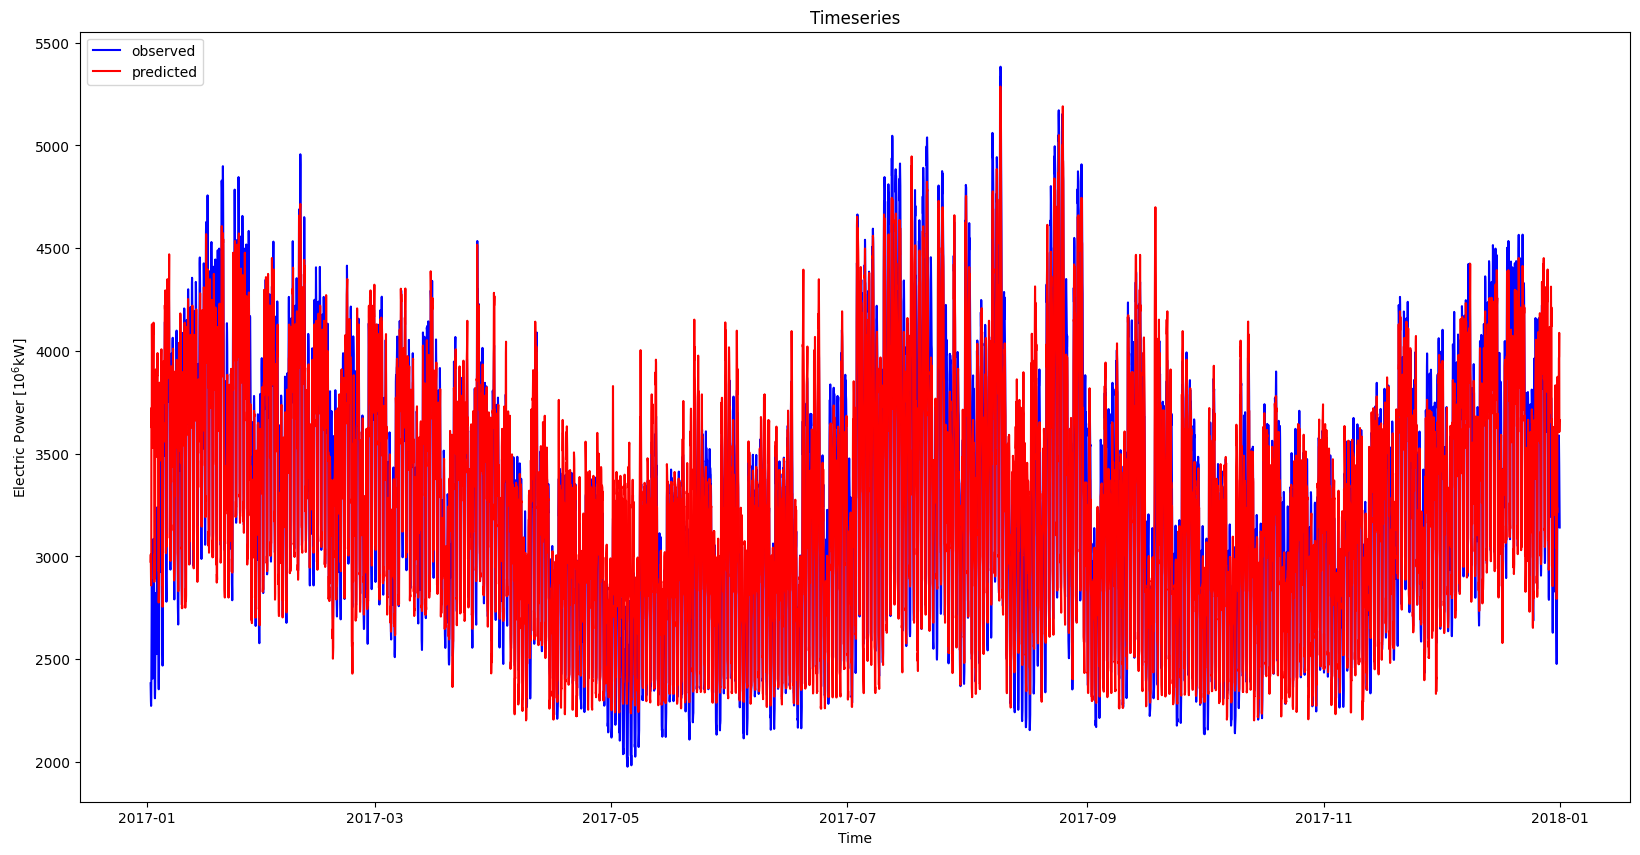

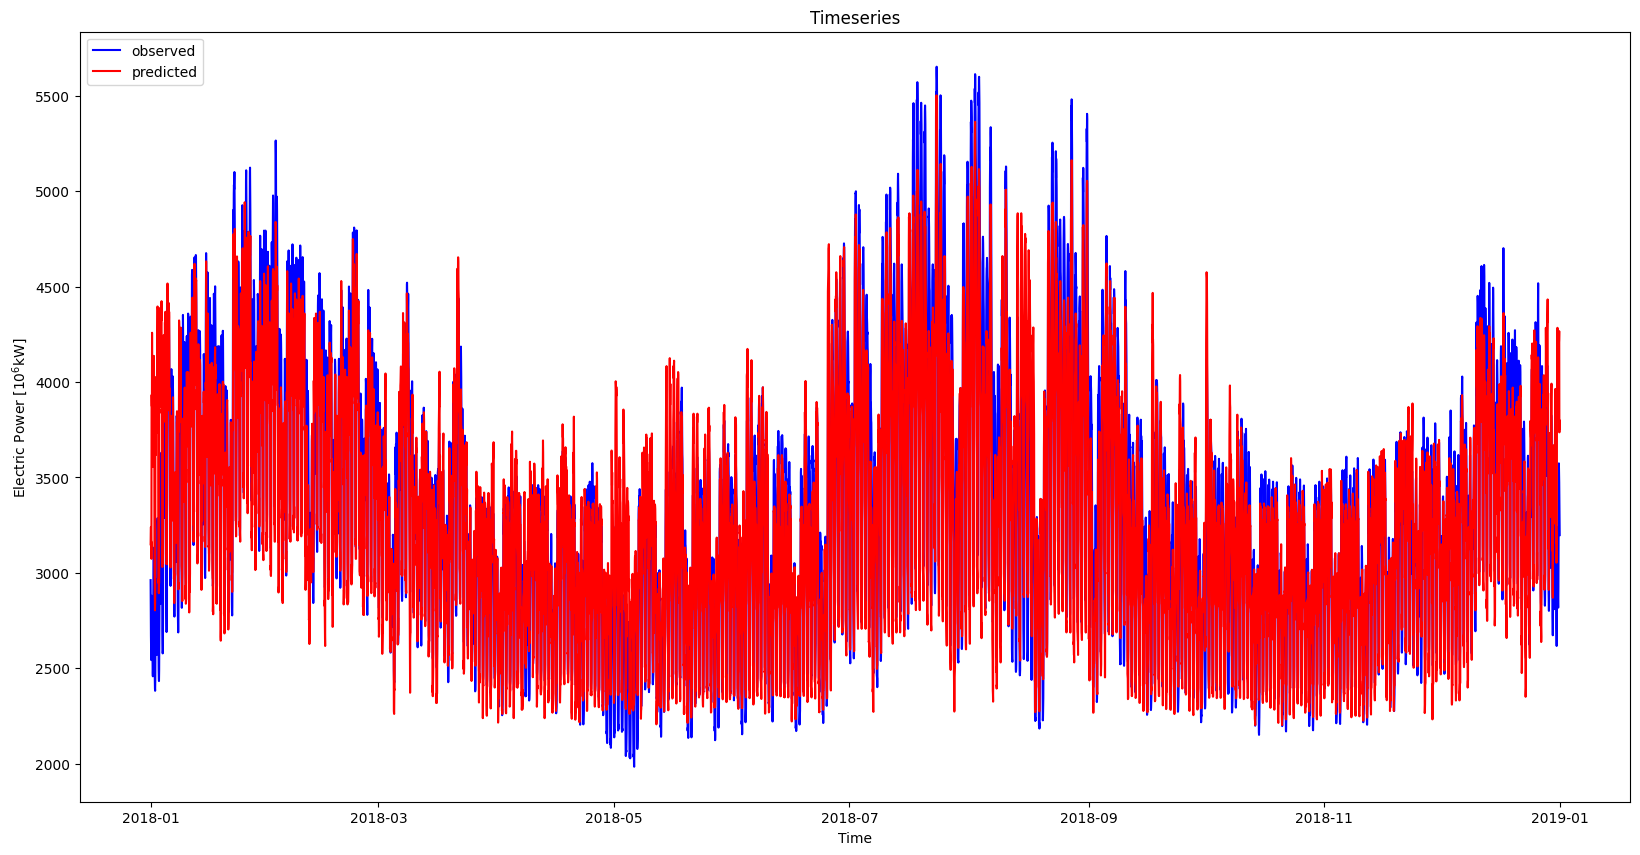

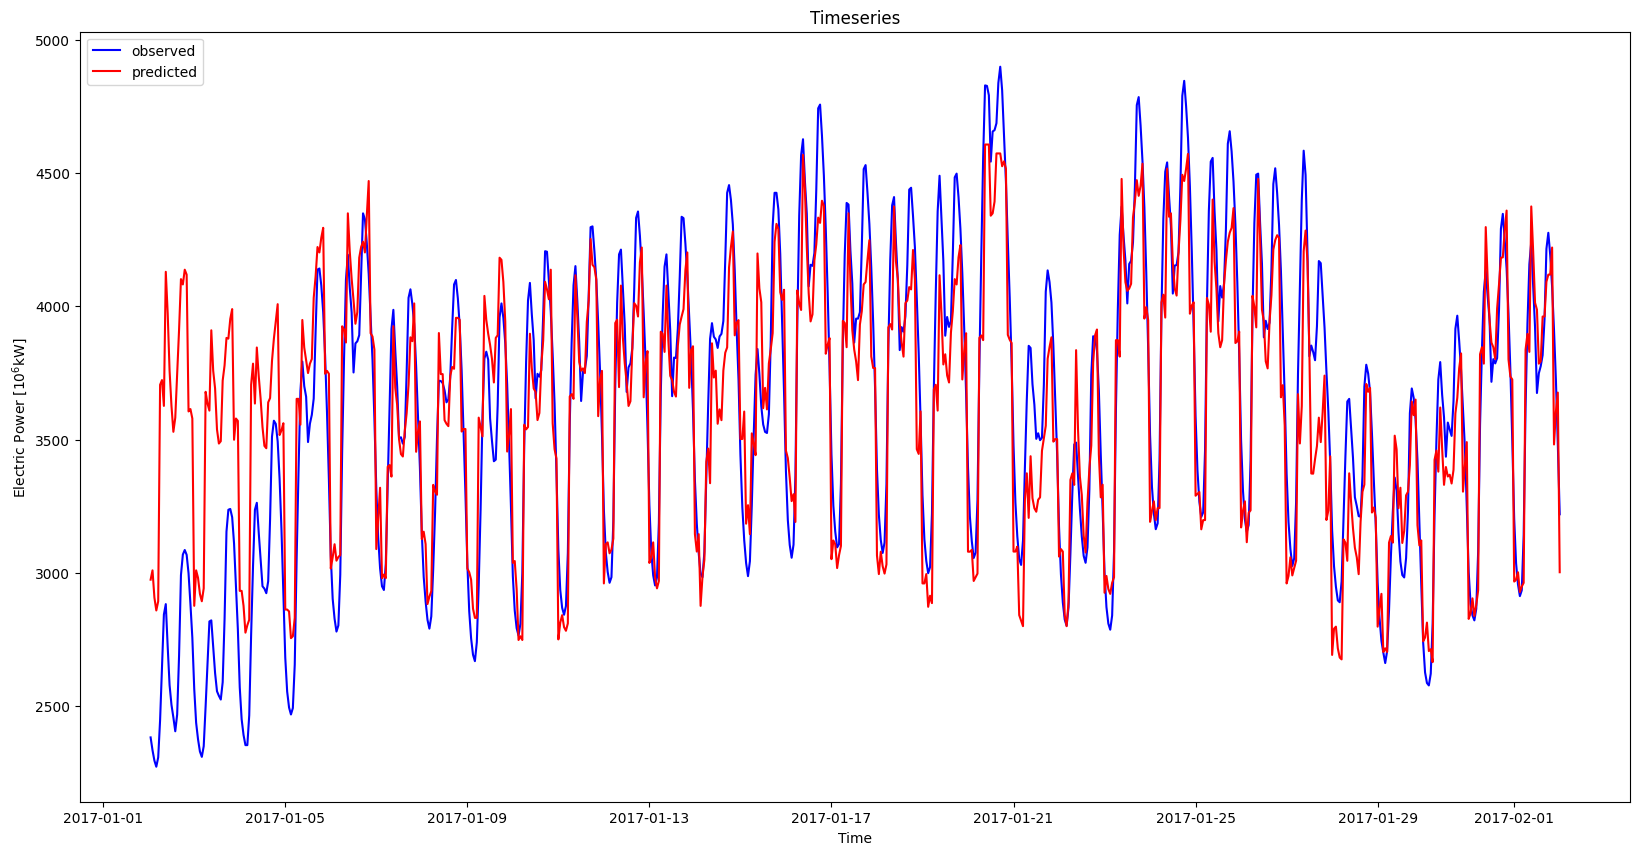

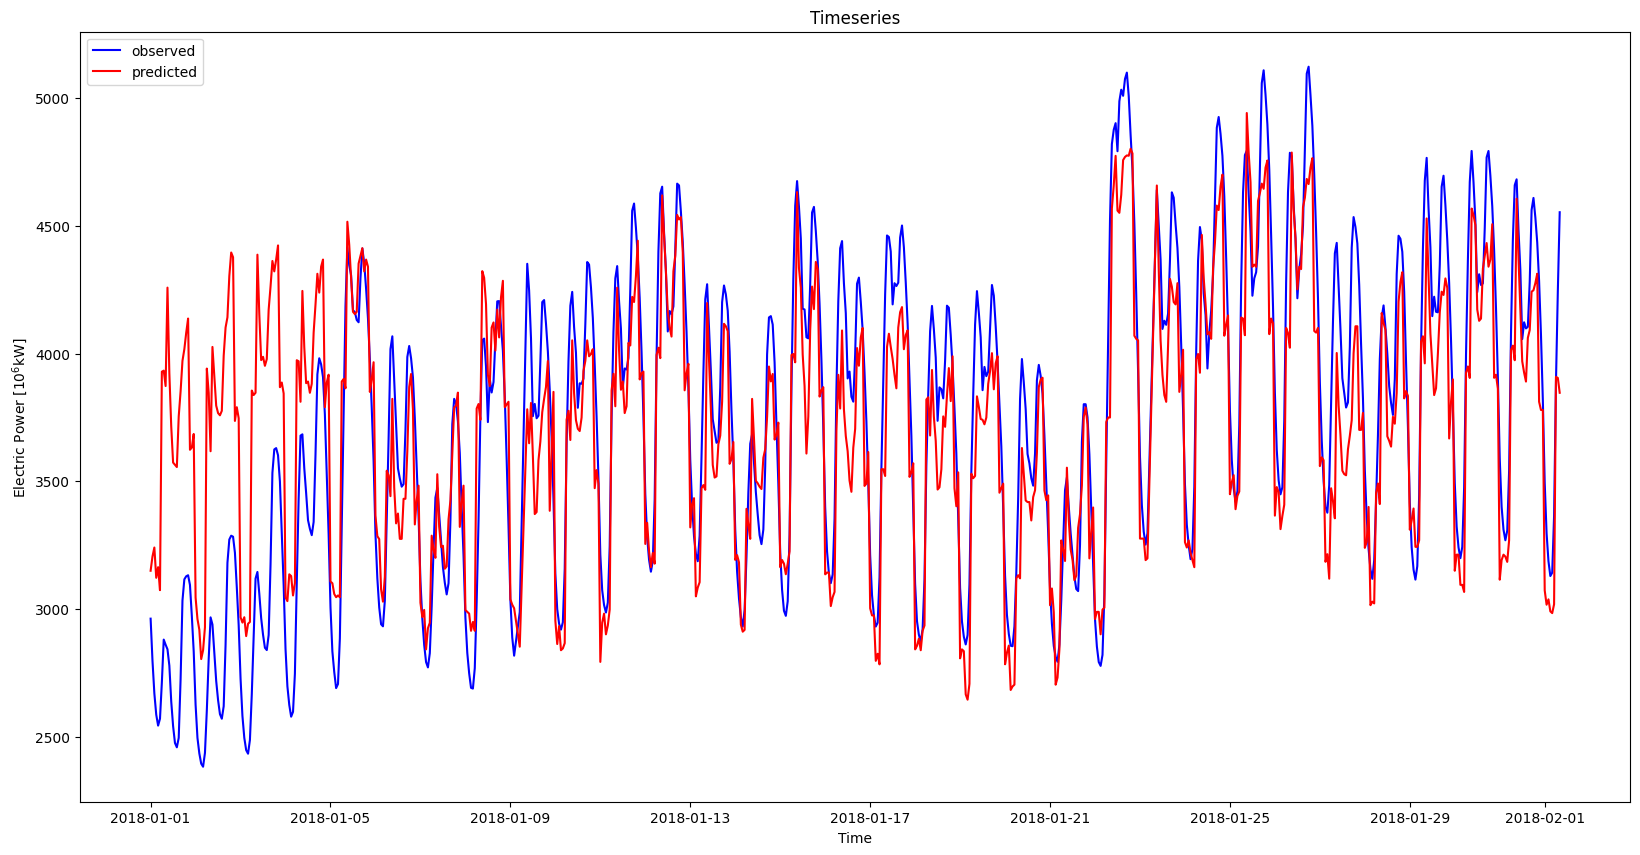

In [12]:
# 予測モデルの結果（testおよびtrain）から時系列図を作成します
def timeseries(datetime_x, y1, y2):
    # dfのインデックス（時間）をXとする
    X=datetime_x
    # dfのname1列を指定してデータを取り出し，numpy配列で値をY1に与える．
    Y1=y1
    # dfのname1列を指定してデータを取り出し，numpy配列で値をY2に与える．
    Y2=y2
    # 時系列図の大きさを指定
    plt.figure(figsize=(20, 10))
    # y_obsvの時系列図
    plt.plot(X,Y1,color='blue',label='observed')
    # y_frcstの時系列図
    plt.plot(X,Y2,color='red',label='predicted')
    # グラフのタイトル
    plt.title("Timeseries")
    # x軸のラベル
    plt.xlabel('Time')
    # y軸（左側の第1軸）のラベル
    plt.ylabel('Electric Power [$10^6$kW]')
    # 凡例（左上に置く）
    plt.legend(loc='upper left')
    return

# datetime_xとする
datetime_x=list(data.index)
# 2018年1月1日のデータの行番号を取得する
# 学習用データと検証用データに別けるために，全体の行（len(data)）を2で割る
dt1=int(len(data)/2)
# 学習用データの1ヶ月分の行
dtm1=744
# 2018年2月1日のデータの行番号を取得する
dtm2=dt1+dtm1
# データを用いて時系列図を作成します．
# 訓練データ（正解データと予測データ）の1年分の時系列図
timeseries(datetime_x[:dt1],y_train,y_train_predict)
# 検証データ（正解データと予測データ）の1年分の時系列図
timeseries(datetime_x[dt1:],y_test,y_test_predict)
# 訓練データ（正解データと予測データ）の1ヶ月分の時系列図
timeseries(datetime_x[:dtm1], y_train[:dtm1], y_train_predict[:dtm1])
# 検証データ（正解データと予測データ）の1ヶ月分の時系列図
timeseries(datetime_x[dt1:dtm2],y_test[:dtm1], y_test_predict[:dtm1])

ニューラルネットワークにより予測された電力消費量の時系列図の結果を見てみると，正解データと予測データは良い一致を示していることが分かります．「気温」，「曜日」，「時刻」というたった３つのパラメータで，季節スケールの変化，週スケールの変化，日スケールの変化を適切に表現できていることが分かります．前回の診断的分析の議論の結果ともよく整合していることが分かります．<span style="color: red; ">非線形的な変化を表現できるニューラルネットワークを用いることで，「夏季」「12～15時」「平日」といった条件別けをしてそれぞれに予測モデルを作らなくても一気通貫で予測できることが明らかとなりました．</span>

次に，横軸に正解データの電力消費量と予測データの電力消費量との間を取ることで，各時刻のデータをプロットした **散布図** を`matplotlib`で作成してみましょう．表計算ソフトExcelの場合には，2つの列データを選択して，ツールバーの中の散布図ボタンを押すプロセスです．

予測モデルの精度が高いときには，散布図上では， **一方が上がれば一方が上がる関係（正の相関）** となるはずです．予測モデルの精度が低いときには，このように一本の線に乗らず全体的に散らばったような分布となるはずです．

次のセルは，散布図を作成する関数`scatter`（2行目）を定義し，それを呼び出すことで **訓練データ** の中の **正解データ`y_train`** と **予測データ`y_train_predicted`**から散布図を作成しています（23行目）．関数`scatter`の中では，まず，図の大きさを指定し（6行目）と`x`（ここでは`y_train`）と`y`（ここでは`y_train_predicted`）の散布図を作成しています（8行目）．

比較となる，$y=x$の線を引いています（10行目）．散布図の点がこの線の上に乗ると高精度な予測モデルであると言えます．12行目では，先に計算した予測モデルの決定係数$R^2$を文字型`score`として図の左上に置いています．13行目から18行目は，グラフのタイトル，横軸`X`のラベル，縦軸`Y`のラベルを設定しています．

同様の要領で，25行目では，関数`scatter`を利用して，**検証データ** の中の **正解データ`y_test`** と **予測データ`y_test_predicted`** から散布図を作成しています．

それでは以下のセルを実行してみましょう．

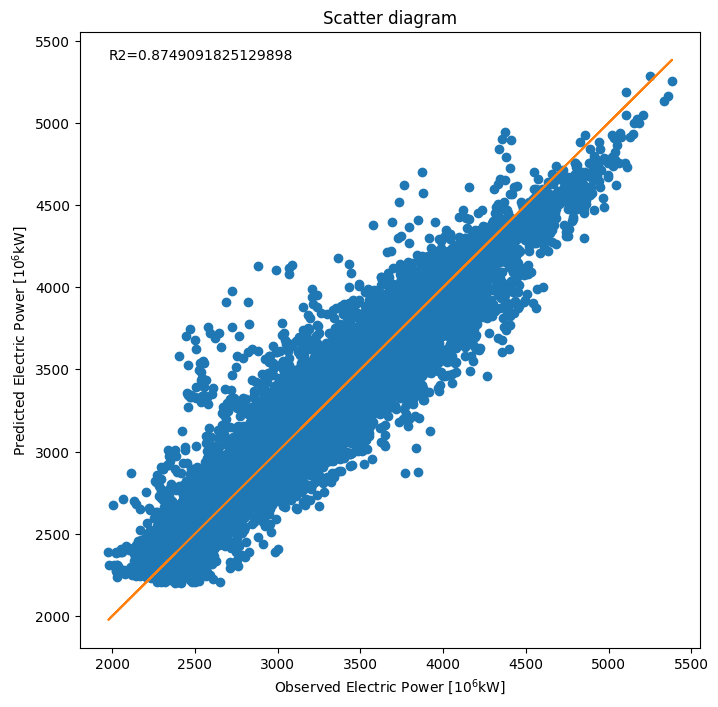

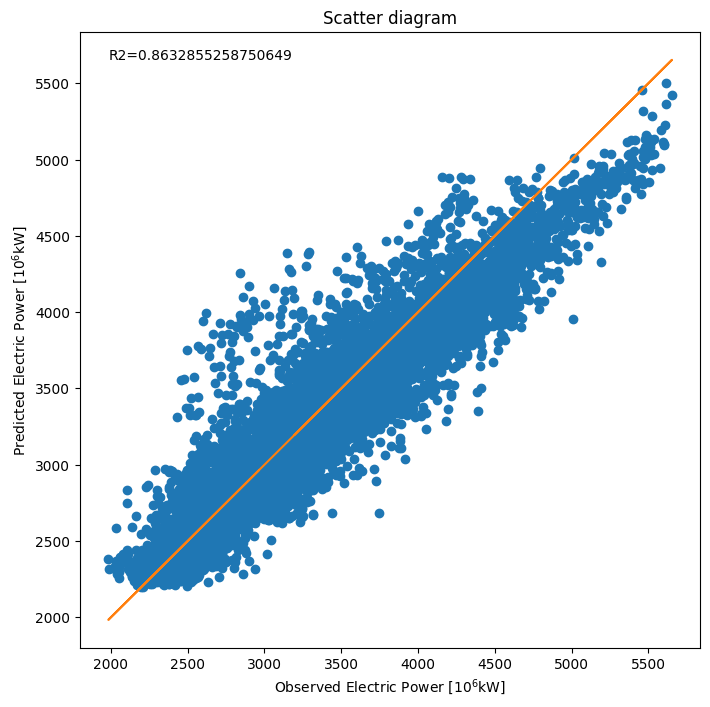

In [13]:
# 予測モデルの結果（testおよびtrain）から散布図を作成します
def scatter(x, y,score):
    # 文字列"R2=score"
    score="R2="+str(score)
    # 散布図の大きさを指定
    plt.figure(figsize=(8, 8))
    # 散布図のプロット
    plt.plot(x, y, 'o')
    # Y=Xの線を引く
    plt.plot(x, x)
    # 文字列R2=r2)"を図の左上に置く
    plt.text(np.nanmin(x), np.nanmax(x), score)
    # グラフのタイトル
    plt.title("Scatter diagram")
    # x軸のラベル
    plt.xlabel('Observed Electric Power [$10^6$kW]')
    # y軸のラベル
    plt.ylabel('Predicted Electric Power [$10^6$kW]')
    return

# データを用いて散布図を作成します．
# 訓練データ（正解データと予測データ）の1年分の時系列
scatter(y_train, y_train_predict,score_train)
# 検証データ（正解データと予測データ）の1年分の時系列
scatter(y_test, y_test_predict,score_test)

電力消費量の正解（横軸）と予測（縦軸）の散布図を見ると，$y=x$の直線の周りに分布し，決定係数$R^2$のスコアも0.9に近く，**ニューラルネットワーク**の高いパフォーマンスが確認できました．しかし，実用面を考えるとより精度が高くなることが望まれます．

是非，皆さんも，説明変数を変更したり，ニューラルネットワークのハイパーパラメータを変更したりすることで，**より精度の高い予測モデルの開発**を目指して下さい．

### 2.5 まとめ

●　予測モデルの開発のためには，データ分析により説明変数と目的変数の設計を行います．<BR>
●　データを適切に要約・整理します．<BR>
●　データを適切に標準化します．<BR>
●　線形重回帰モデルやニューラルネットワークモデルなどの統計的モデルを利用します．<BR>
●　統計的モデルにより重み係数やバイアスの最適化を行います．<BR>
●　決定係数$R^2$により予測モデルの精度を検証します．<BR>
●　時系列図や散布図を確認することで予測モデルの特性を考察し，更なる高精度化に向けて検討します．<BR>

皆さんも，気象庁の高精度な気象予測データと機械学習による予測モデルを組み合わせることによって，これまで誰もできなかった新しいビジネスが実現できるようになるかもしれませんね．